In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")



100%|██████████| 3.27k/3.27k [00:00<00:00, 1.47MB/s]

Extracting files...


In [2]:
print("Path to dataset files:", path)
file_path = os.path.join(path,'Social_Network_Ads.csv')
df = pd.read_csv(file_path) 
df

Path to dataset files: C:\Users\USER PC\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Accuracy: 0.87

Confusion Matrix:
[[62  1]
 [12 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



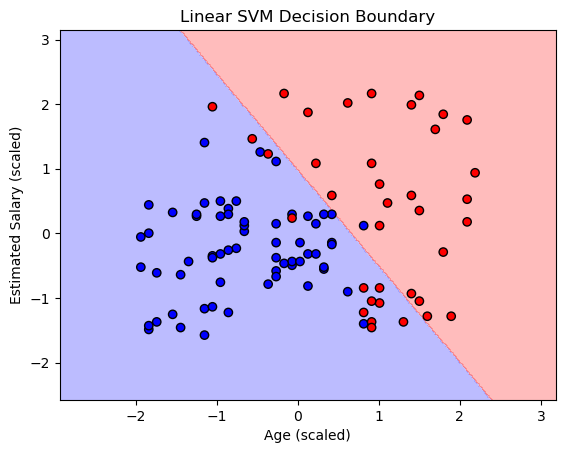

In [16]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Load the Dataset
# -----------------------------
#df = pd.read_csv('/content/Social_Network_Ads.csv')

# Use only relevant columns ('Age', 'EstimatedSalary') and target ('Purchased')
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# -----------------------------
# 3. Split into Train & Test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 4. Feature Scaling (Important for SVM)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train Linear SVM Model
# -----------------------------
svm_model = SVC(kernel='linear', C=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Make Predictions
# -----------------------------
y_pred = svm_model.predict(X_test_scaled)

# -----------------------------
# 7. Evaluate Accuracy & Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# -----------------------------
# 8. Plot Decision Boundary
# -----------------------------
def plot_svm_boundary(model, X_scaled, y):
    # Create grid to draw decision boundary
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_svm_boundary(svm_model, X_test_scaled, y_test)


Accuracy: 0.94

Confusion Matrix:
[[59  4]
 [ 2 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.90      0.95      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



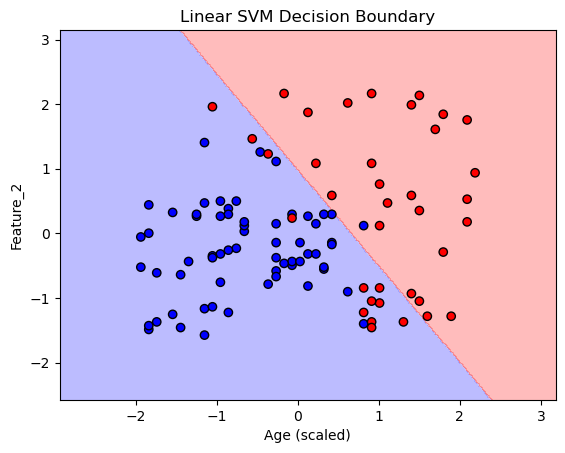

In [17]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Load Dataset
# -----------------------------
#df = pd.read_csv('/content/Social_Network_Ads.csv')
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# -----------------------------
# 3. Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 4. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train Non-Linear SVM (RBF Kernel)
# -----------------------------
svm_rbf = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Predictions
# -----------------------------
y_pred = svm_rbf.predict(X_test_scaled)

# -----------------------------
# 7. Evaluation
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# -----------------------------
# 8. Plot Decision Boundary
# -----------------------------
def plot_svm_boundary(model, X_scaled, y):
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Feature_2')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_svm_boundary(svm_model, X_test_scaled, y_test)